In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("kyphosis.csv")
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


## statistical analysis

In [3]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## check for missing values

In [4]:
df.isnull().values.any()

False

## value counts for the two classifications

In [5]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['Kyphosis'] = label_encoder.fit_transform(df['Kyphosis'])
df['Kyphosis'].unique()

array([0, 1])

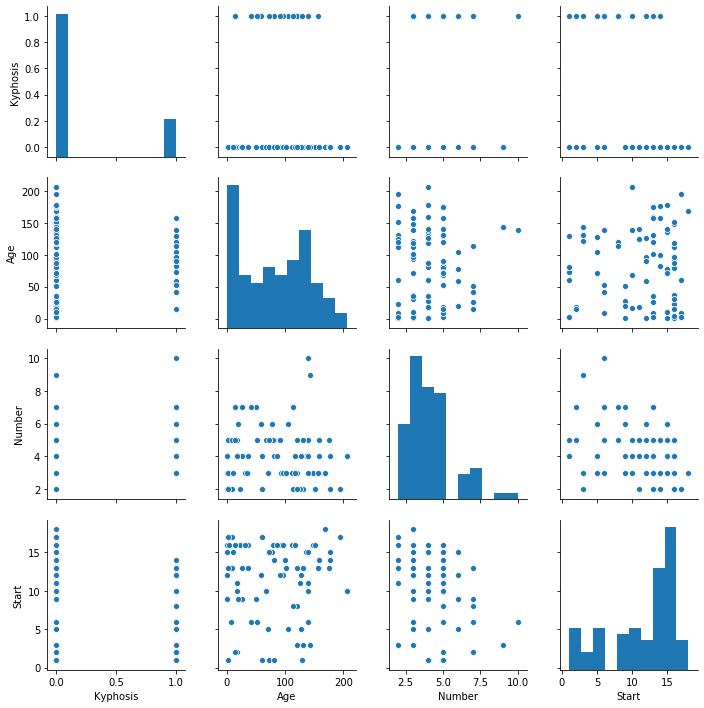

In [7]:
sns.pairplot(df)

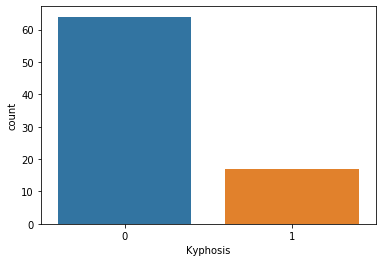

In [8]:
sns.countplot(x="Kyphosis", data=df)

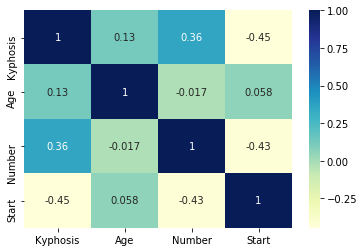

In [9]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap="YlGnBu", annot=True)

In [10]:
X = df[['Age', 'Number', 'Start']]
Y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

## Decision Tree Classifier

In [12]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.810


In [13]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
print("confusion matrix for Decision Tree Classifier: ")
print(confusion_matrix(y_test, y_pred_tree))
print("classification report for Decision Tree Classifier: ")
print(classification_report(y_test, y_pred_tree))

confusion matrix for Decision Tree Classifier: 
[[16  2]
 [ 2  1]]
classification report for Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.33      0.33      0.33         3

    accuracy                           0.81        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.81      0.81      0.81        21



In [29]:
# print(classification_report(y_test, y_pred_tree))

## Hyperparameters Tuning

In [16]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "splitter": ["best", "random"],
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": range(1,10)
}

In [17]:
grid = GridSearchCV(tree, param_grid=param_dict, n_jobs=-1)
grid.fit(X_train, y_train)

/home/kunal/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/kunal/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                 

In [18]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 6,
 'splitter': 'random'}

In [23]:
print("accuracy score for Decision Tree Classifier after hyperparameter tuning:")
print(grid.best_score_)

accuracy score for Decision Tree Classifier after hyperparameter tuning:
0.8666666666666667


In [21]:
print(grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=6, splitter='random')


# Random Forest Classifier

In [24]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

/home/kunal/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
# accuracy_score(y_test, y_pred_forest)
print("accuracy score for Random Forest Classifier:")
print(accuracy_score(y_test, y_pred_forest))

accuracy score for Random Forest Classifier:
0.8571428571428571


In [27]:
# confusion_matrix(y_test, y_pred_forest)
print("confusion matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_forest))

confusion matrix for Random Forest Classifier:
[[17  1]
 [ 2  1]]


In [28]:
print("classification report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

classification report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.50      0.33      0.40         3

    accuracy                           0.86        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.84      0.86      0.84        21

